In [1]:
import h5py
from scipy.signal import detrend, decimate, butter, filtfilt
import matplotlib.pyplot as plt
import numpy as np
from scipy.fft import fft2, fftfreq, fftshift, ifft2, ifftshift

## Load the data

In [2]:
path = "/data/fast0/ethan-scratch/OOI_South_2Hz/"
file = "OOI_South_2Hz_2021-11-02T000000.h5"

f = h5py.File(path + file, 'r')
data = np.array(f['/Data'])
f.close()

## Plot the frequency-only filtered data (not FK yet)

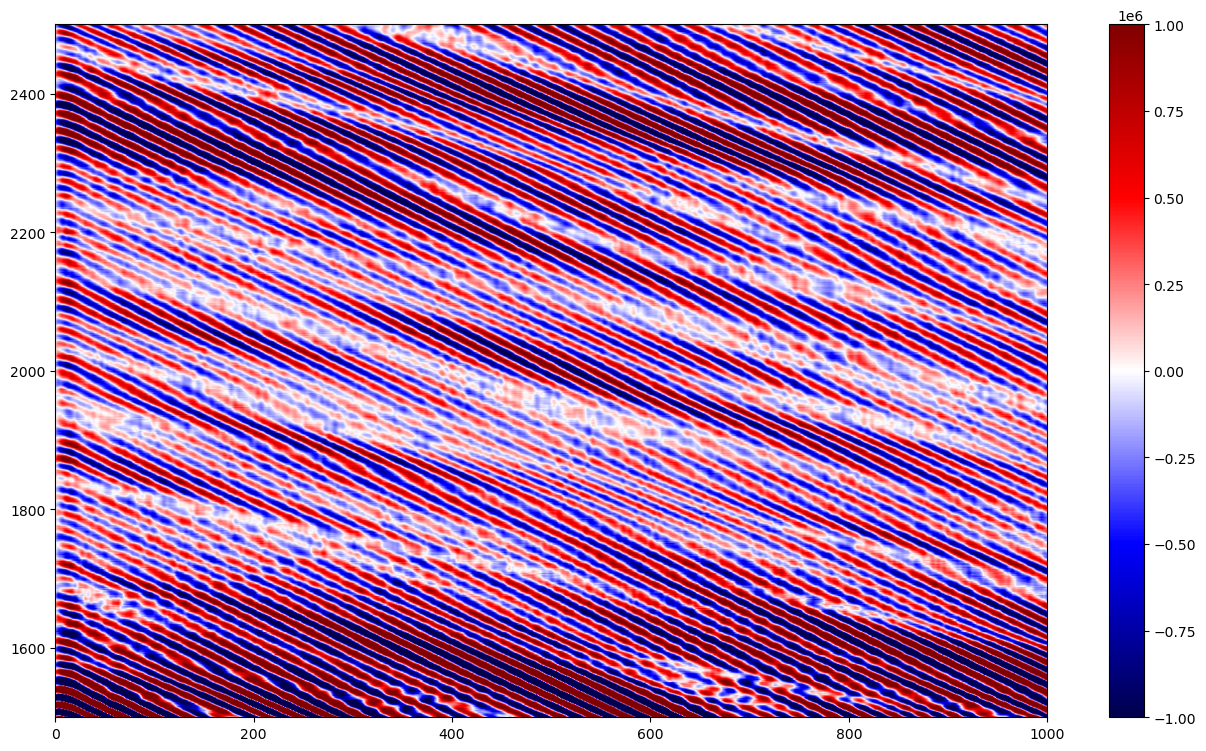

In [3]:
b,a = butter(2,[1/30/2, 0.5/2],'bandpass')
data_filt  = filtfilt(b,a,data)

vm = 1e6
fig,ax = plt.subplots(figsize=(16,9))
c=plt.imshow(data_filt[::10,:],cmap='seismic',aspect='auto',vmin=-vm,vmax=vm)
plt.ylim([1500,2500])
plt.xlim([0,1000])
plt.colorbar(c)

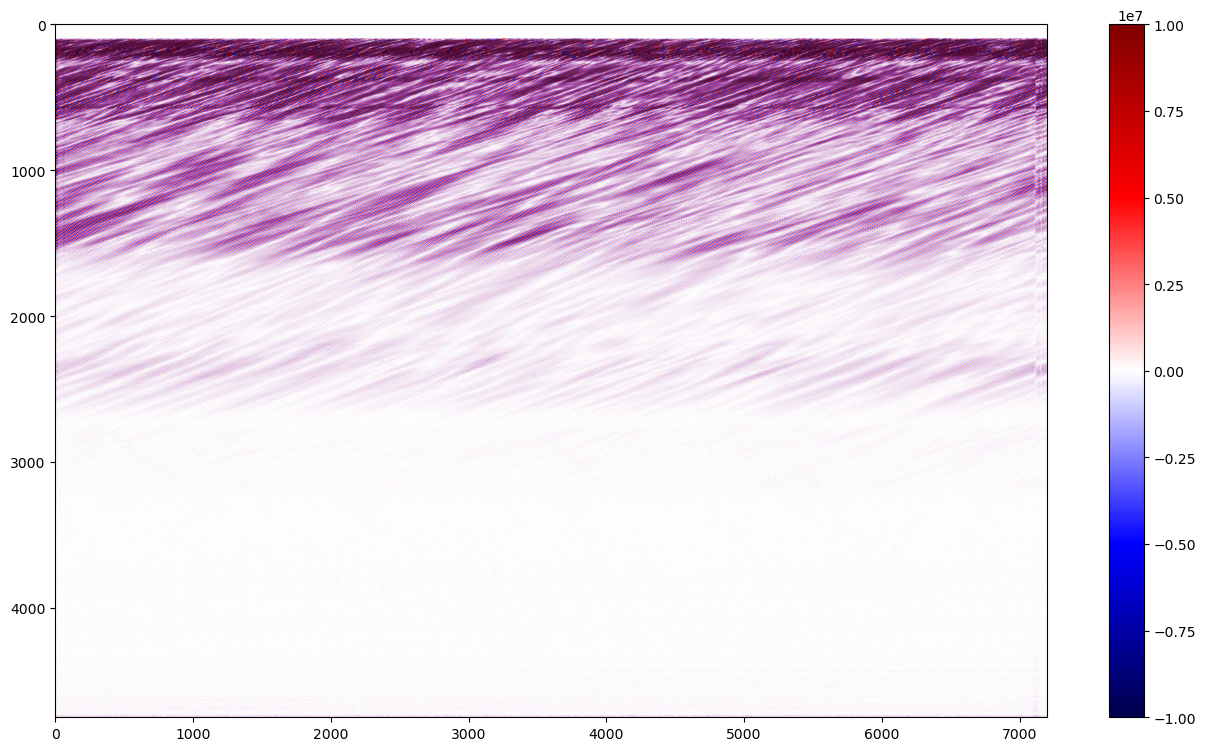

In [14]:
vm = 1e7
fig,ax = plt.subplots(figsize=(16,9))
c=plt.imshow(data_filt[::10,:],cmap='seismic',aspect='auto',vmin=-vm,vmax=vm)
# plt.ylim([1500,2500])
# plt.xlim([0,1000])
plt.colorbar(c)

## Now do the FK filter using a 2D FFT

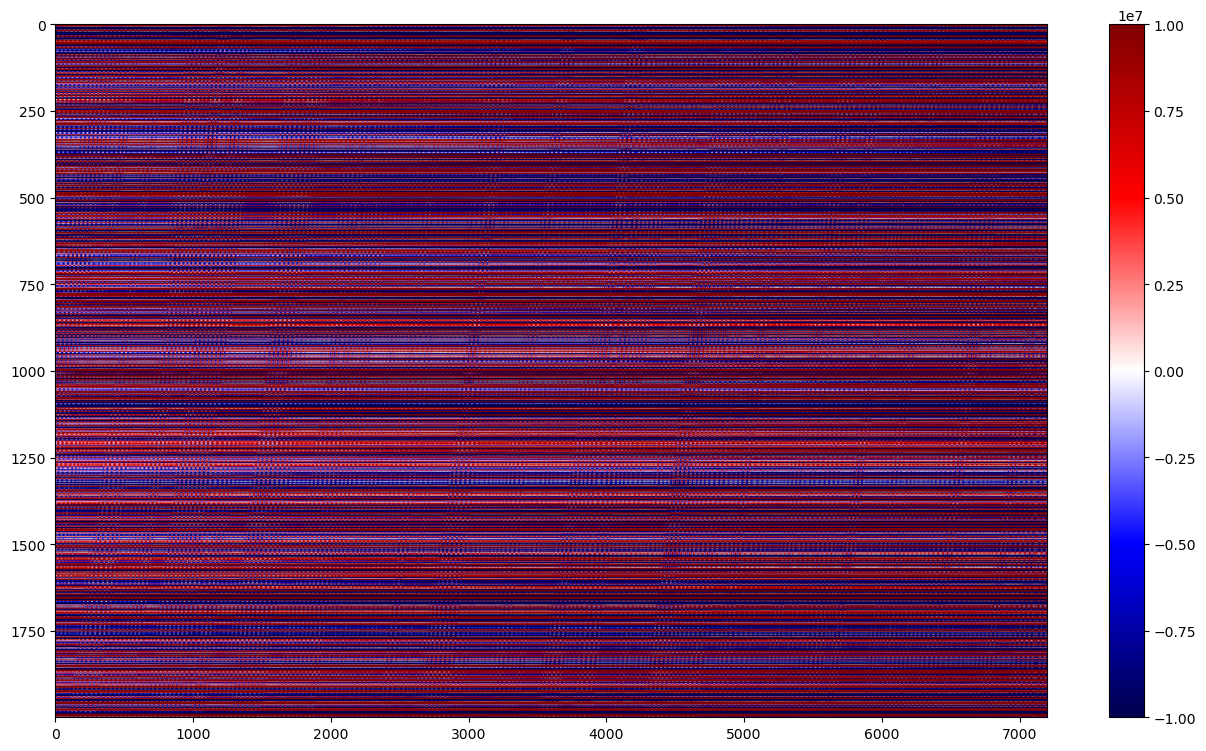

In [38]:
vm = 1e7
sl = slice(9000,11000)
fig,ax = plt.subplots(figsize=(16,9))
c=plt.imshow(data_filt[sl,:],cmap='seismic',aspect='auto',vmin=-vm,vmax=vm)
# plt.ylim([1500,2500])
# plt.xlim([0,1000])
plt.colorbar(c)

In [34]:

ft = fftshift(fft2(data[sl,:]))
ft_filt = fftshift(fft2(data_filt[sl,:]))
f = fftshift(fftfreq(ft.shape[1],1/2))
k = fftshift(fftfreq(ft.shape[0],2))

(1000, 7200)


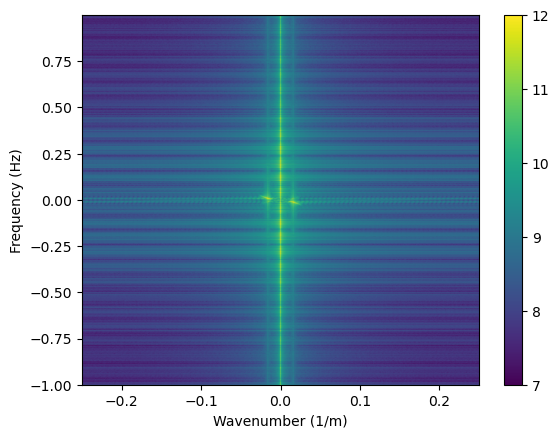

In [35]:
c=plt.imshow(np.log10(np.abs(ft)),aspect='auto',
             extent=[k[0],k[-1],f[0],f[-1]],
             vmin = 7,vmax=12)
plt.colorbar(c)
plt.ylabel('Frequency (Hz)')
plt.xlabel('Wavenumber (1/m)')
print(ft.shape)

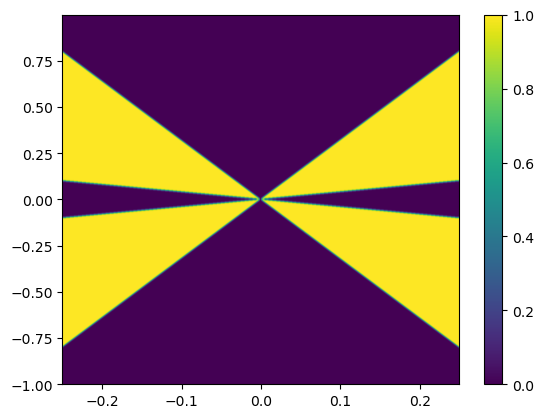

In [6]:
FF,KK=np.meshgrid(f,k)
filter = np.zeros_like(ft)
filter[ np.abs(FF) > 5*np.abs(KK) ] = 1
filter[ np.abs(FF) > 40*np.abs(KK) ] = 0

from scipy.ndimage import gaussian_filter
filter = gaussian_filter(filter,2)

plt.subplots()
c=plt.imshow(np.abs(filter),aspect='auto',extent=[k[0],k[-1],f[0],f[-1]],)
plt.colorbar(c)
plt.show()

In [7]:
ft_fk = ft*filter
ft_filt_fk = ft_filt*filter

/tmp/ipykernel_511800/1197640935.py:1: RuntimeWarning: divide by zero encountered in log10
  c=plt.imshow(np.log10(np.abs(ft_fk)),aspect='auto',extent=[k[0],k[-1],f[0],f[-1]],


(1000, 7200)


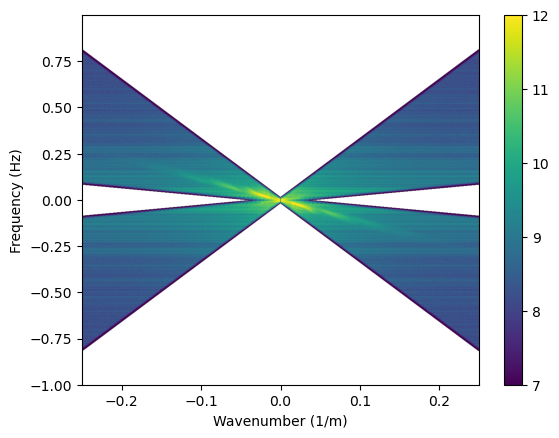

In [8]:
c=plt.imshow(np.log10(np.abs(ft_fk)),aspect='auto',extent=[k[0],k[-1],f[0],f[-1]],
             vmin = 7,vmax=12)
plt.colorbar(c)
plt.ylabel('Frequency (Hz)')
plt.xlabel('Wavenumber (1/m)')
print(ft.shape)

In [9]:
data_fk = ifft2(ifftshift(ft_fk))
data_filt_fk  = ifft2(ifftshift(ft_filt_fk))

(0.0, 1000.0)

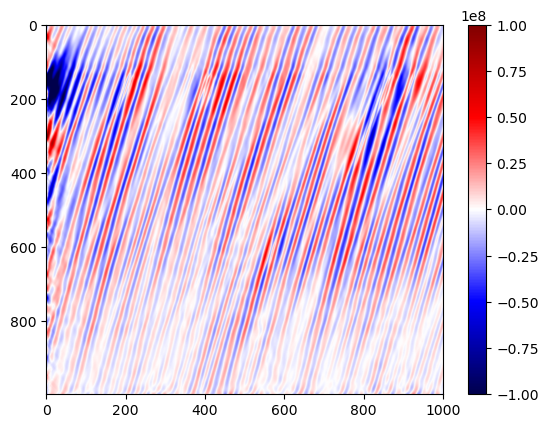

In [10]:
vm = 1e8
c=plt.imshow(np.real(data_fk),aspect='auto',cmap='seismic',vmin=-vm,vmax=vm)
plt.colorbar(c)
plt.xlim([0,1000])

(0.0, 2000.0)

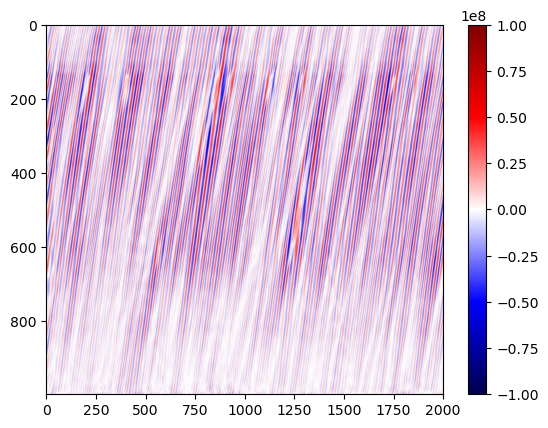

In [13]:
vm = 1e8
c=plt.imshow(np.real(data_filt_fk),aspect='auto',cmap='seismic',vmin=-vm,vmax=vm)
plt.colorbar(c)
plt.xlim([0,2000])